In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
transform = transforms.ToTensor()

#transform = transform.Compose([
#    transforms.ToTensor(),
#    transforms.Normalize((0.5), (0.5))
#])

mnist_data = datasets.MNIST(root='./data', train=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset = mnist_data,
                                         batch_size = 64,
                                         shuffle = True)

In [4]:
dataiter = iter(data_loader)
#images, labels = dataiter.next()
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [5]:
class Autoencoder(nn.Module):
    def __init__(self):
        # Image size -> N, 1, 28,28 = 28*28 (N - Batch size)
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),     # N, 16, 14, 14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),    # N, 32, 7, 7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)                           # N, 64, 1, 1
        )
        
        # N, 64, 1, 1
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),          # N, 32, 7, 7
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),  # N, 16, 14, 14
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),  # N, 1, 28, 28
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
# Note: [-1, 1] -> nn.Tanh
# nn.MaxPool2d -> nn.MaxUnpool2d

In [6]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [7]:
num_epochs = 10
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0083
Epoch:2, Loss:0.0070
Epoch:3, Loss:0.0037
Epoch:4, Loss:0.0039
Epoch:5, Loss:0.0038
Epoch:6, Loss:0.0038
Epoch:7, Loss:0.0028
Epoch:8, Loss:0.0034
Epoch:9, Loss:0.0028
Epoch:10, Loss:0.0029


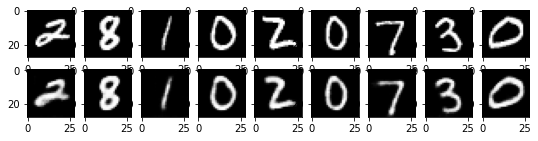

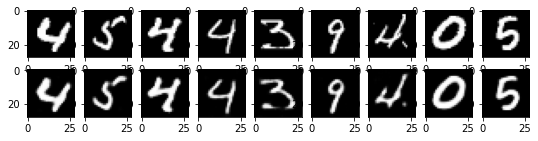

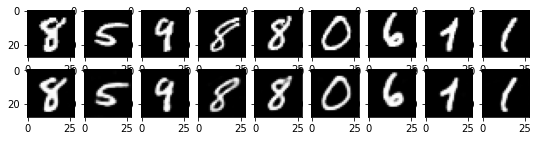

In [8]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        
        # item: 1, 28, 28
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)    # row_length + i + 1
        
        # item: 1, 28, 28
        plt.imshow(item[0])